In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

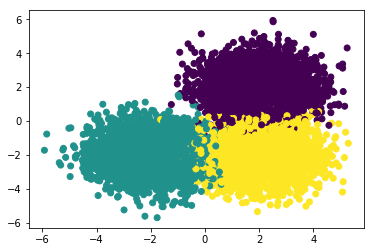

In [4]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

In [8]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.3, n_samples=1000)


# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))



Number of estimated clusters: 3


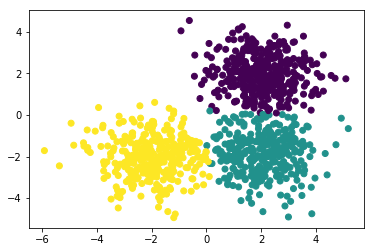

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      352   10    0
1        1    9  310
2        5  306    7


In [9]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

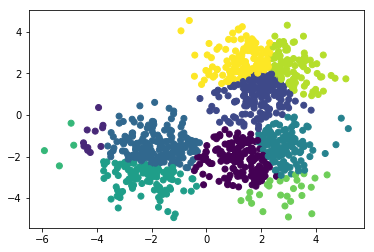

Comparing the assigned categories to the ones in the data:
col_0    0   1    2    3    4    5  6   7   8    9
row_0                                             
0        0   0  128    0    2    0  0   0  93  139
1       19  11    1  179    0  106  4   0   0    0
2      136   0   23    2  130    1  0  26   0    0


In [12]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=10

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

In [7]:
#These clusters look familiar, though the two dots at the top are interesting.

In [13]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 32


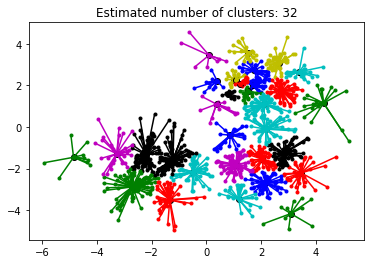

In [14]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

In [ ]:
#practicing blog configurations on my own.

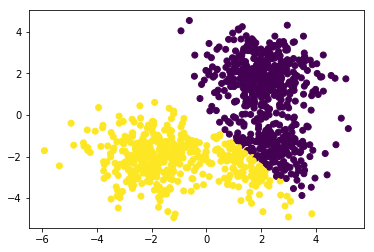

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0      362    0
1        2  318
2      202  116


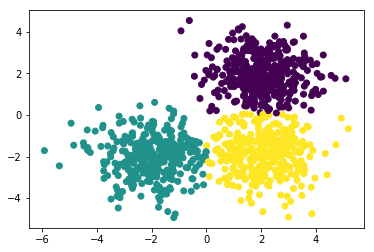

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      352    0   10
1        1  310    9
2        6    5  307


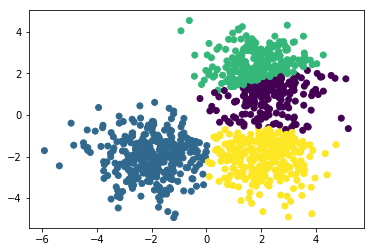

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0      137    0  224    1
1        1  310    0    9
2       37    6    0  275


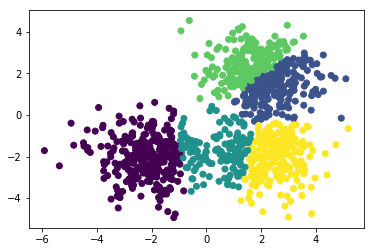

Comparing the assigned categories to the ones in the data:
col_0    0    1   2    3    4
row_0                        
0        0  170   4  187    1
1      266    0  53    1    0
2        1   14  92    1  210


In [22]:
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import confusion_matrix
# Calculate predicted values.

n_clusters = [2, 3, 4, 5]

for n in n_clusters:
    y_pred = KMeans(n_clusters=n, random_state=45).fit_predict(X_train)

    km = KMeans(n_clusters=n)
    km.fit(X_train)

    #Predicted clusters.
    predict=km.fit_predict(X_train)


    plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
    plt.show()


    # Check the solution against the data.
    print('Comparing the assigned categories to the ones in the data:')
    print(pd.crosstab(y_train,predict))


In [ ]:
#For K-means I would say 3 clusters provides the structure of the clusters and the clusters have some distance
#between them.

Number of estimated clusters: 4


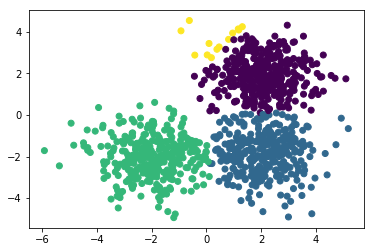

Comparing the assigned categories to the ones in the data:
col_0    0    1    2   3
row_0                   
0      338   11    0  13
1        1    9  310   0
2        6  304    8   0
Number of estimated clusters: 3


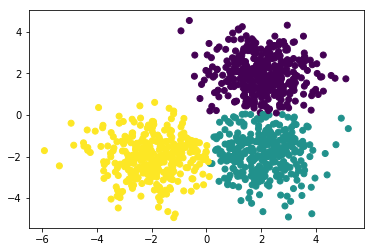

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      352   10    0
1        1    9  310
2        6  304    8
Number of estimated clusters: 1


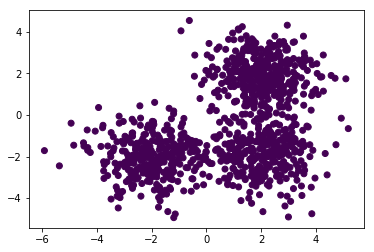

Comparing the assigned categories to the ones in the data:
col_0    0
row_0     
0      362
1      320
2      318


In [29]:
from sklearn.cluster import MeanShift, estimate_bandwidth

n_quantile = [0.1, 0.2, 0.4]

for n in n_quantile:
    bandwidth = estimate_bandwidth(X_train, quantile=n, n_samples=1000)

    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(X_train)


    #Predicted clusters.
    predict=ms.fit_predict(X_train)

    # Extract cluster assignments for each data point.
    labels = ms.labels_

    # Coordinates of the cluster centers.
    cluster_centers = ms.cluster_centers_

    # Count our clusters.
    n_clusters_ = len(np.unique(labels))

    print("Number of estimated clusters: {}".format(n_clusters_))


    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
    plt.show()


    # Check the solution against the data.
    print('Comparing the assigned categories to the ones in the data:')
    print(pd.crosstab(y_train,predict))
    


In [ ]:
#looks like as quantitle increases the number of clusters decreases. 

Cluster number: 3


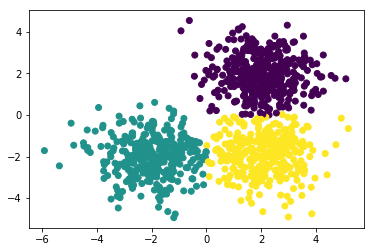

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      357    0    5
1        1  310    9
2        7    5  306
Cluster number: 5


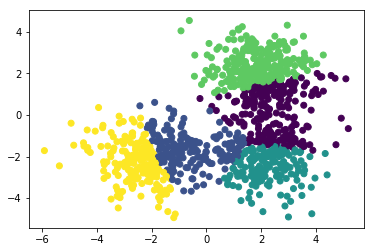

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4
row_0                         
0      116    0    0  246    0
1        1  134    1    0  184
2       95   58  165    0    0
Cluster number: 7


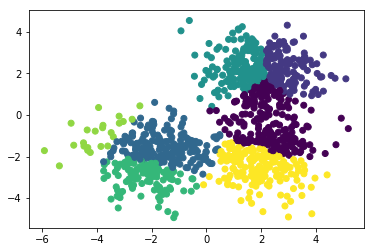

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4   5    6
row_0                                  
0       81  124    0  157    0   0    0
1        1    0  179    1  112  23    4
2      132    0   11    1    1   0  173


In [32]:
from sklearn.cluster import SpectralClustering

n_clusters = [3, 5, 7]

for n in n_clusters:
    sc = SpectralClustering(n_clusters=n)
    sc.fit(X_train)

    print("Cluster number: {}".format(n))
    
    #Predicted clusters.
    predict=sc.fit_predict(X_train)

    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
    plt.show()


    # Check the solution against the data.
    print('Comparing the assigned categories to the ones in the data:')
    print(pd.crosstab(y_train,predict))
    

In [ ]:
#Cluster = 3 provides the best structure data where the clusters are separated enough in space.

In [35]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics



af = AffinityPropagation()
af.fit(X_train)
    
#Predicted clusters.
predict=af.fit_predict(X_train)

    
    # Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))


Estimated number of clusters: 32


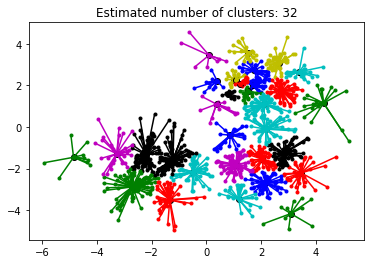

In [36]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()